In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

In [2]:
def list_mul_2d(M, m):
    """ M is a list of lists. Multiply each one of them by m."""
    return [[m * x for x in L] for L in M]

def f(h, t, U, extra = 0):  
    v = np.matmul(U, h)
    v0 = v[0, 0]
    v1 = v[0, 1]
    [x, y] = h
    
    xdot = 0.5*(np.tanh(v0) - x)
    ydot = 0.5*(np.tanh(v1) - y)
    
    return [xdot, ydot]

def solve(U, x_init):    
    times = np.linspace(0, 500, 2000)  
    xs = odeint(f, x_init, times, args = (U, 0))
    
    return xs

def eu_dist(x1, x2):
    """Euclidean distance between points x1 and x2 in R^n."""   
    return np.linalg.norm(x1 - x2)

def get_distance(x_init, xs):
    return [eu_dist(x_init, x) for x in xs]

In [3]:
U = np.matrix([[0.1, -0.1],[-1, 0]])
xs = solve(U, [0.5, 0.5])

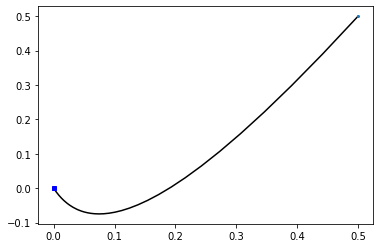

In [4]:
plt.plot(xs[:,0], xs[:,1], '-', color = 'black') # path
plt.plot([xs[0,0]], [xs[0,1]], 'o', markersize = 2) # start
plt.plot([xs[-1,0]], [xs[-1,1]], 's', markersize = 4, color='blue') # end